In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/3ZgrmW0', 
                 usecols=['date', 'mortalities'])
df.date = pd.to_datetime(df.date)
df = df.sort_values('date')
df = df.set_index('date')
df.tail()

,mortalities
date,
2021-03-03,297
2021-03-04,315
2021-03-05,256
2021-03-06,233
2021-03-07,84


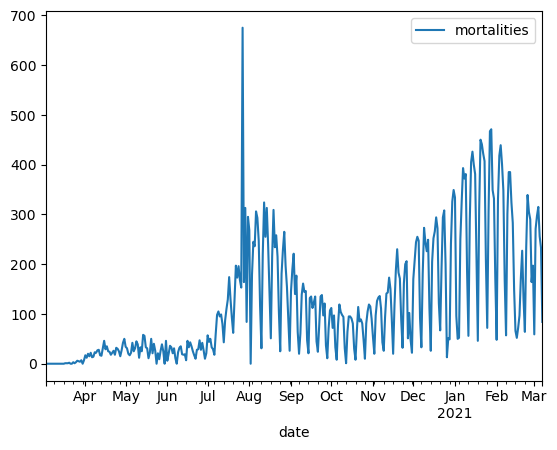

In [3]:
df.plot();

In [4]:
print(f"Max. Value: {df['mortalities'].max()}")
print(f"Date: {df['mortalities'].idxmax()}")

Max. Value: 675
Date: 2020-07-27 00:00:00


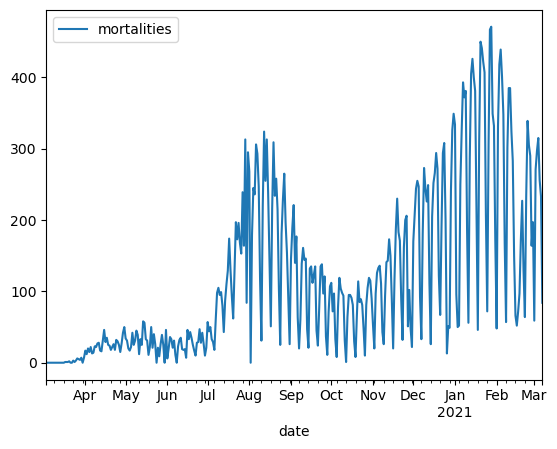

In [5]:
# Set aberrant spike at 2020-7-27 to CDC value of 239 deaths:
df.loc['2020-7-27', 'mortalities'] = 239  
df.plot();

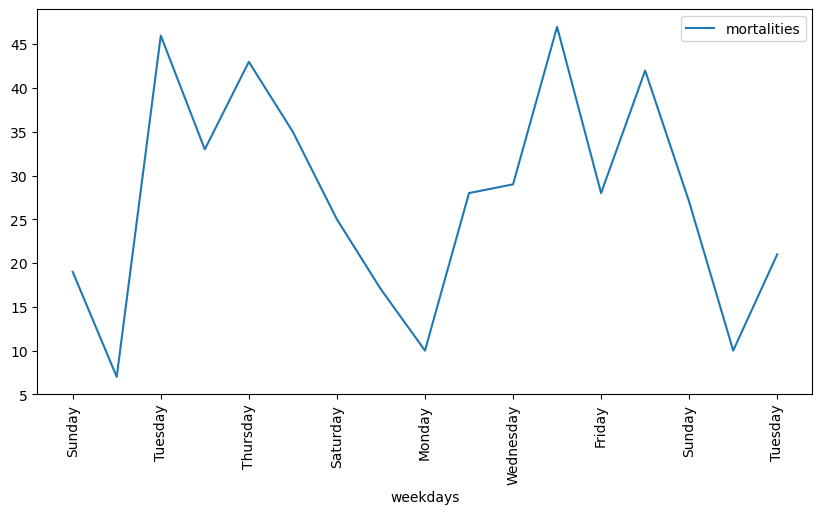

In [6]:
# Examine values by weekday:
df_weekdays = df.copy()
df_weekdays['weekdays'] = df.index.day_name()

df_weekdays.iloc[103:120].plot(figsize=(10, 5), rot=90, x='weekdays');

In [7]:
# Highlight Mondays in the DataFrame printout:
df_weekdays = df_weekdays.iloc[90:115]
df_weekdays.style.apply(lambda x: ['background: lightgrey' 
                                   if x.weekdays == 'Monday'
                                   else '' for i in x], axis=1)

,mortalities,weekdays
date,,
2020-06-01 00:00:00,6,Monday
2020-06-02 00:00:00,20,Tuesday
2020-06-03 00:00:00,36,Wednesday
2020-06-04 00:00:00,33,Thursday
2020-06-05 00:00:00,21,Friday
2020-06-06 00:00:00,31,Saturday
2020-06-07 00:00:00,11,Sunday
2020-06-08 00:00:00,0,Monday
2020-06-09 00:00:00,23,Tuesday


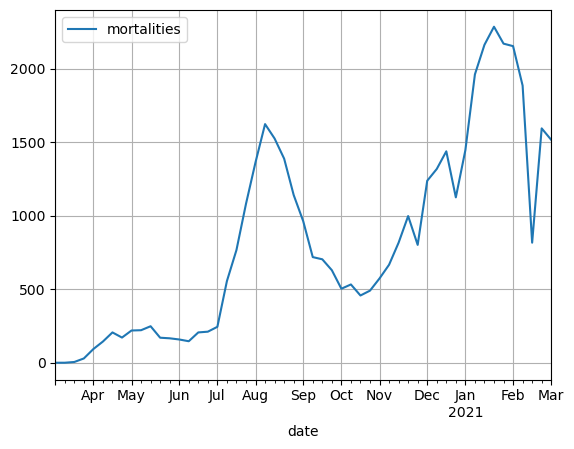

In [8]:
# Resample weekly to remove serrations:
df.resample('W').sum().plot(grid=True);